<a href="https://colab.research.google.com/github/donaghb/college/blob/master/iris_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import files
uploaded = files.upload()

Saving iris_data.csv to iris_data (1).csv


In [58]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['iris_data.csv']))

In [60]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,149.000000,150.000000
mean,9.407333,3.057718,3.773826,1.199333
std,43.621311,0.437311,1.760543,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,540.000000,4.400000,6.900000,2.500000


In [63]:
data.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


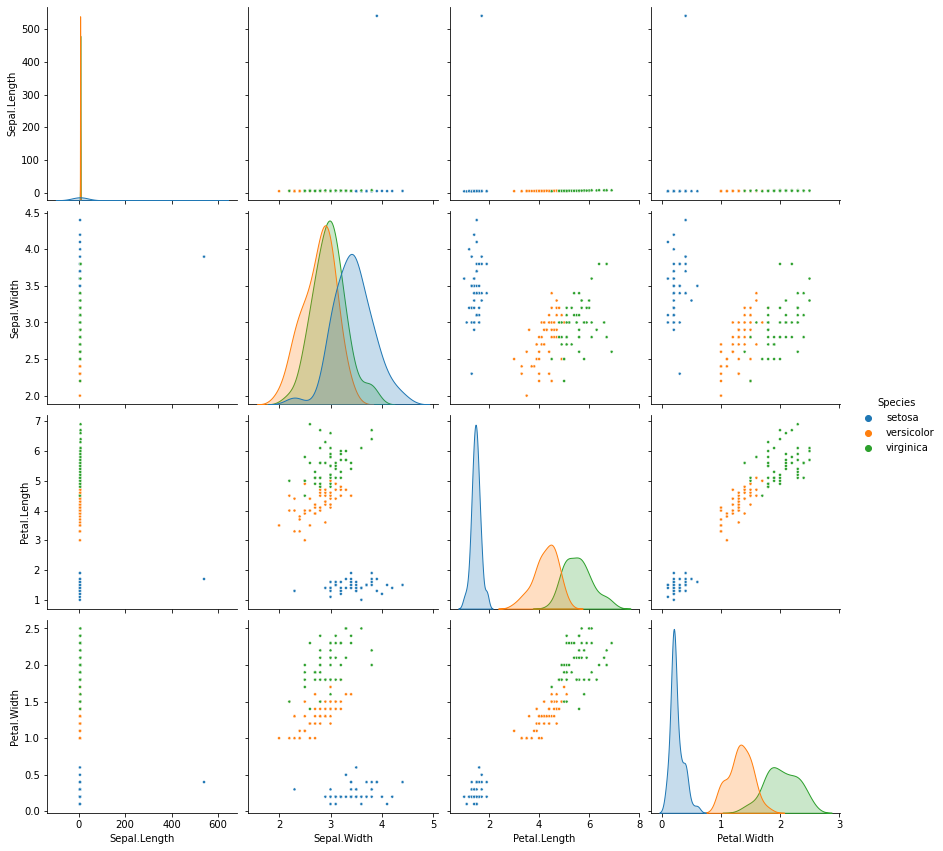

In [66]:
sns.pairplot(data, hue='Species', diag_kind="kde", markers='.',size =3)

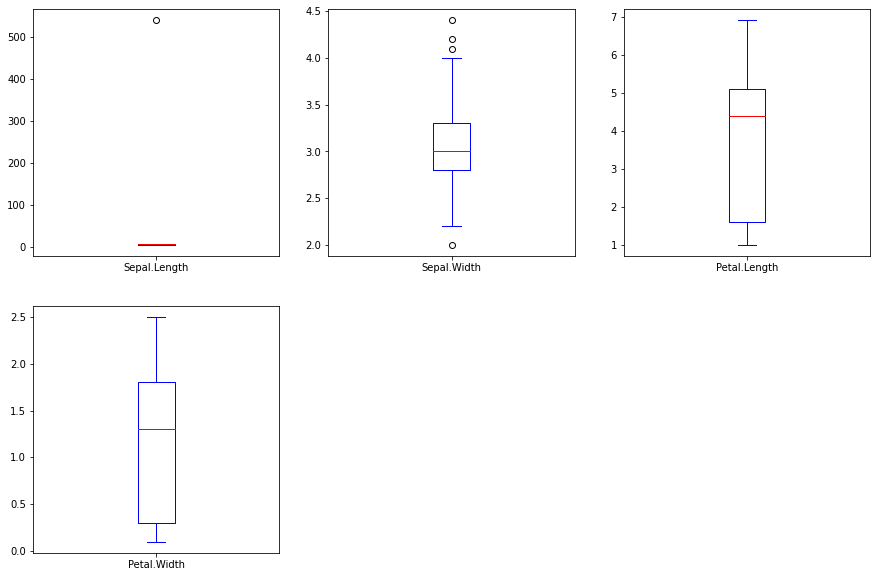

In [68]:
boxplot=data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

In [69]:
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.156707,-0.080786,-0.070727
Sepal.Width,0.156707,1.000000,-0.432266,-0.370039
Petal.Length,-0.080786,-0.432266,1.000000,0.962414
Petal.Width,-0.070727,-0.370039,0.962414,1.000000


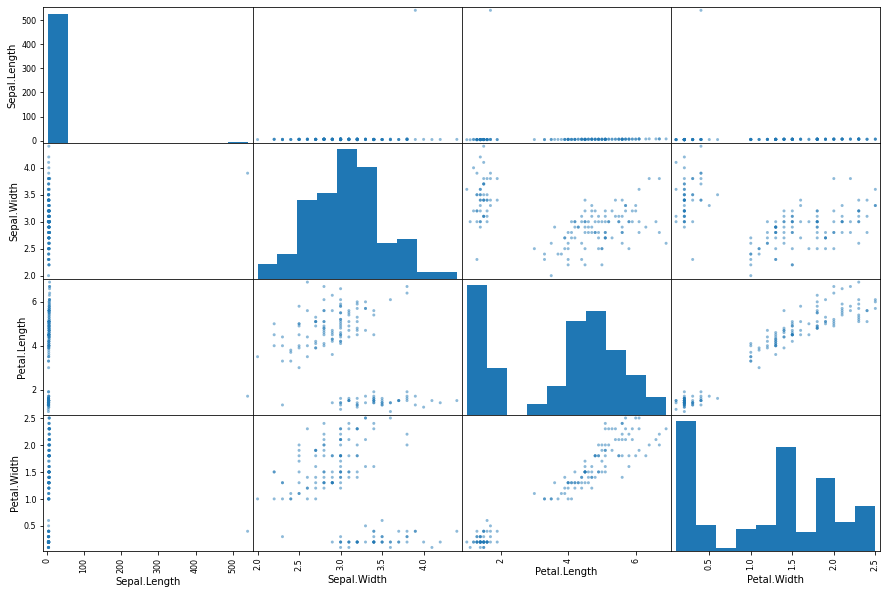

In [70]:
scatter=pd.plotting.scatter_matrix(data,figsize=(15,10))

In [53]:
df.head(20)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,540.0,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


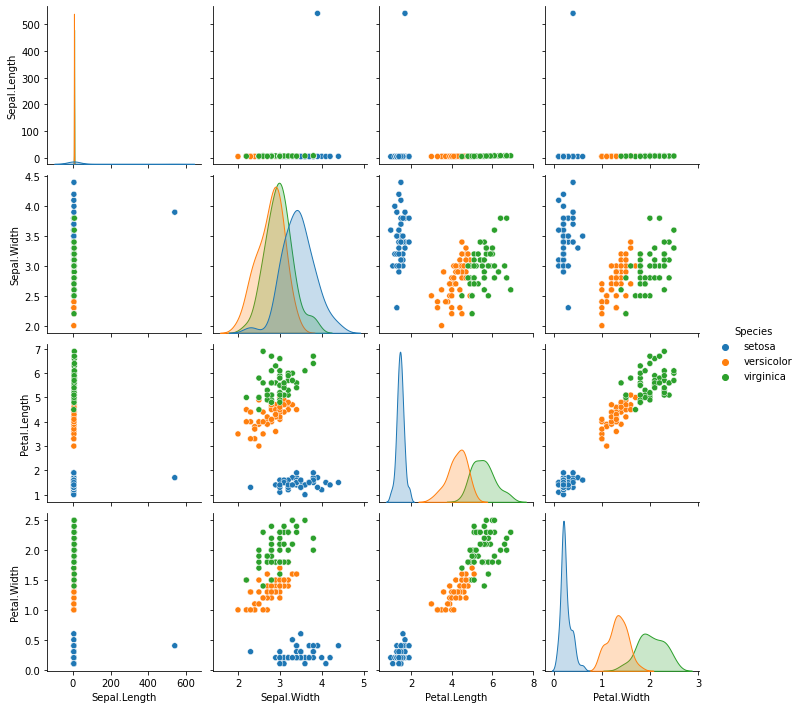

In [23]:
scatterplot=sns.pairplot(df,hue="Species")

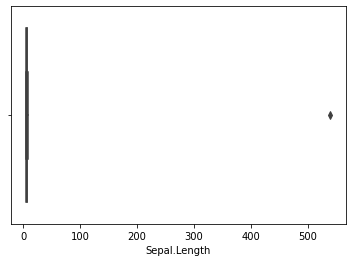

In [22]:

sns.boxplot(x=df['Sepal.Length'])

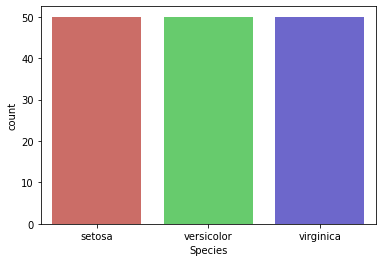

<Figure size 432x288 with 0 Axes>

In [71]:
sns.countplot(x='Species',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


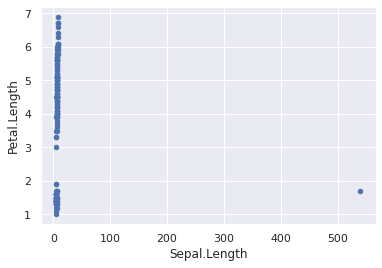

In [76]:
sns.set()
%matplotlib inline
data.plot.scatter(x='Sepal.Length', y='Petal.Length')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


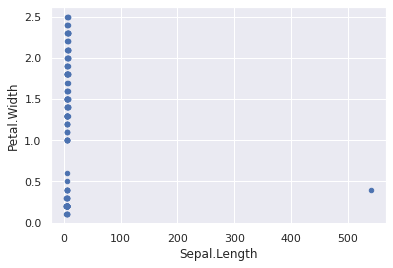

In [77]:
sns.set()
%matplotlib inline
data.plot.scatter(x='Sepal.Length', y='Petal.Width')

In [78]:
corr = data[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,0.156707,-0.080786,-0.070727
Sepal.Width,0.156707,1.000000,-0.432266,-0.370039
Petal.Length,-0.080786,-0.432266,1.000000,0.962414
Petal.Width,-0.070727,-0.370039,0.962414,1.000000


In [85]:
df = data.fillna(data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=df[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']]
X = add_constant(X)
y=df['Species']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

[1.0253952213200168, 1.290299700740711, 12.631817506688385, 11.87452853325219]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size = 0.3, random_state=101)

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [98]:
sv=LogisticRegression()
sv.fit(X_train,Y_train)
sv.predict(X_test)

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Test the model
predictions = sv.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(Y_test, predictions) )

print( accuracy_score(Y_test, predictions))

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'versicolor']

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


In [99]:
sv.score(X_test,Y_test)

0.9777777777777777

In [100]:
test_score=sv.score(X_test,Y_test)
test_score

0.9777777777777777

In [104]:
# Predicting the Test set results
y_pred = sv.predict(X_test)
# Predict probabilities
probs_y=sv.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("Y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(Y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

Y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
setosa     | setosa     | 1.0        | 0.0           | 0.0       
setosa     | setosa     | 0.99       | 0.01          | 0.0       
setosa     | setosa     | 0.96       | 0.04          | 0.0       
virginica  | virginica  | 0.0        | 0.31          | 0.68      
versicolor | versicolor | 0.08       | 0.73          | 0.19      
virginica  | virginica  | 0.0        | 0.32          | 0.68      
versicolor | versicolor | 0.0        | 0.61          | 0.39      
versicolor | versicolor | 0.01       | 0.85          | 0.13      
virginica  | virginica  | 0.0        | 0.2           | 0.8       
setosa     | setosa     | 0.93       | 0.07          | 0.0       
virginica  | virginica  | 0.0        | 0.16          | 0.84      
setosa     | setosa     | 1.0        | 0.0           | 0.0       
setosa     | setosa     | 0.97       | 0.03          | 0.0       
virginic